# Aula 09 - Visualização de dados para tomada de decisão
(fortemente baseada no módulo de NumPy, Pandas e Matplotlib do _AI Programming with Python Nanodegree_ da Udacity)

A exploração de dados de _qualquer_ dataset começa com a visualização univariada.
* **Objetivo:** intuição de como cada variável é distribuída antes de pensar em interações mais complexas.
![](http://www.tamarabroderick.com/img/dino_release.png)

É nessa etapa que encontramos bizarrices como _outliers_ e onde descobrimos quais pedaços dos dados podem precisar de mais processamento.

## Dados bonitos <3
Um _dataset_ limpo é tabular e:
* cada variável é uma coluna
* cada observação é uma linha
* cada tipo de unidade observacional é uma tabela

**Vocês já devem saber como brincar disso, então vamos fazer de conta que o mundo é lindo e os dados são bonitos. Esse é o caso do nosso _dataset_**.

## Pokemon
![](https://media.giphy.com/media/10LKovKon8DENq/giphy.gif)
O _dataset_ tem atributos utilizados para calcular quanto dano um ataque causará nos jogos de Pokémon (não o _card game_ nem Pokemon Go). Os atributos são:
* #: número de cada Pokemon
* Name: nome de cada Pokemon
* Type 1: todo Pokemon tem um tipo que determina a resistência/fraqueza a ataques
* Type 2: alguns Pokemons são _dual type_ e têm dois
* Total: soma de todas as estatísticas a seguir. É um guia geral de quão forte o Pokemon é
* HP: _hit points_ ou saúde. Define quanto dano um Pokemon aguenta antes de desmaiar
* Attack: modificador base de ataques normais (ex.: _scratch_, _punch_, ...)
* Defense: base de resistência a dano contra ataques normais
* SP Atk: _special attack_. Modificador base para ataques especiais ( ex: _fire blast_, _bubble team_, ...)
* SP Def: base de resistência contra ataques especiais
* Speed: determina qual Pokemon começa atacando em cada rodada
* Generation: geração em que o Pokemon apareceu
* Legendary: binário para se o Pokemon é lendário ou não

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
pokemon.shape

(800, 13)

### Gráfico de barras, o mais tradicional
Infalível para variáveis qualitativas!

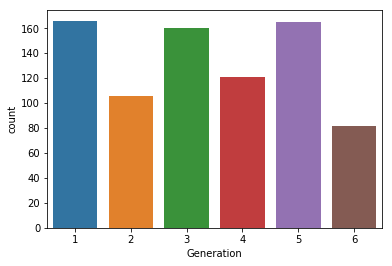

In [4]:
sns.countplot(data = pokemon,
             x = 'Generation');

Noice! Mas olhar pra coisas com tantas cores, nesse caso, pode ser mais uma distração que um ganho... Vamos ver como fica com uma cor só.

In [5]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [6]:
base_color = sns.color_palette()[0]

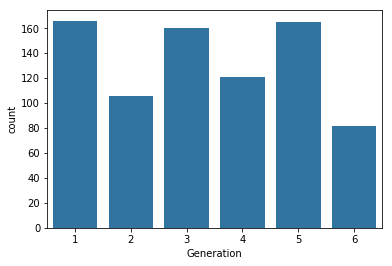

In [7]:
sns.countplot(data = pokemon,
              x = 'Generation',
              color = base_color);

Esse gráfico dá enfase pra parte temporal das gerações. Mas se estivermos interessados na ótica de quantos Pokemons apareceram em cada geração, pode ser mais interessante ordenar de forma decrescente.

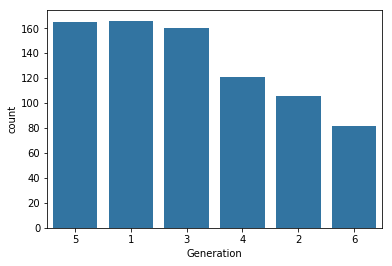

In [8]:
sns.countplot(data = pokemon,
              x = 'Generation',
              color = base_color,
              order = [5, 1, 3, 4, 2, 6]);

Mas isso foi um bocado manual... Podemos fazer isso programaticamente, porque Pandas <3

In [9]:
pokemon['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [10]:
generation_order = pokemon['Generation'].value_counts().index
generation_order

Int64Index([1, 5, 3, 4, 2, 6], dtype='int64')

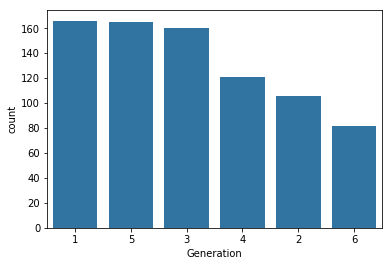

In [11]:
sns.countplot(data = pokemon,
              x = 'Generation',
              color = base_color,
              order = generation_order);

#### Outra variável: Tipo!
Hora de dar o show (:
![](https://media.giphy.com/media/ToMjGpys6SYsvUSE0JW/giphy.gif)

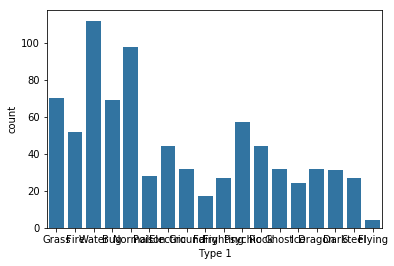

In [12]:
sns.countplot(data = pokemon,
              x = 'Type 1',
              color = base_color);

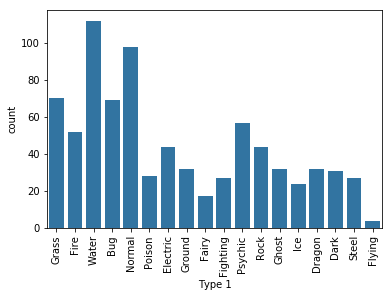

In [13]:
sns.countplot(data = pokemon,
              x = 'Type 1',
              color = base_color);
plt.xticks(rotation = 90);

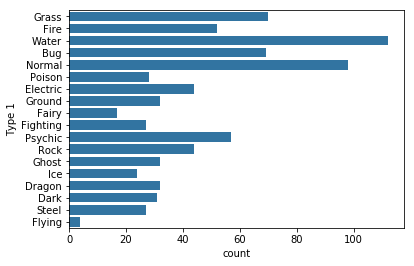

In [14]:
sns.countplot(data = pokemon,
              y = 'Type 1',
              color = base_color);

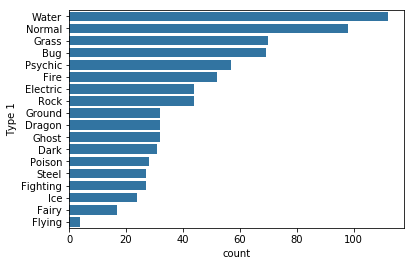

In [15]:
type1_order = pokemon['Type 1'].value_counts().index

sns.countplot(data = pokemon,
              y = 'Type 1',
              color = base_color,
              order = type1_order);

#### Gráfico de Barras, o resumão
Gráficos de barras são usados para visualizarmos a distribuição de uma variável categórica.
* Cada nível da variável é representado por uma barra.
* A altura da barra indica a frequência dos dados naquele nível.

### Gráfico de Pizza
![](https://media.giphy.com/media/9fuvOqZ8tbZOU/giphy.gif)
Utilizado para representar frequências representativas de variáveis categóricas.

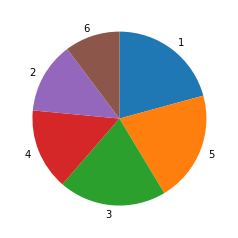

In [16]:
plt.pie(pokemon['Generation'].value_counts(),
        labels = generation_order,
        startangle = 90,
        counterclock = False);

E temos a versão donut, também.

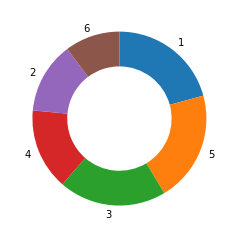

In [17]:
plt.pie(pokemon['Generation'].value_counts(),
        labels = generation_order,
        startangle = 90,
        counterclock = False,
        wedgeprops = {'width': 0.4});

#### Quem odeia pizza?
Eu, nesse caso. Não dá pra entender nada da informação e o gráfico fica pouco informativo. Se eu puder dar uma dica procês, ela é:
> Não usem gráfico de pizza. Nunca. 

(Exceto pra fazer uma brincadeira sobre sabores de pizza).

### Histograma
Histogramas, por outro lado, são lindos.

* Histogramas nos mostram a distribuição de variáveis numéricas.
* É a versão quantitativa do gráfico de barras.
* Porém, cada barra é agrupada por _bins_, que representam os valores num intervalo.

Vamos olhar para a velocidade dos Pokemons.

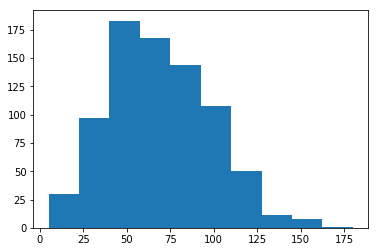

In [18]:
plt.hist(data = pokemon,
         x = 'Speed');

Legal, mas não tá muito fácil de entender o que se passa... Pra resolver isso, podemos usar `bins`.

(array([  5.,  25.,  59.,  38.,  89.,  94., 104.,  64.,  67.,  77.,  79.,
         29.,  36.,  14.,   9.,   2.,   7.,   1.,   0.,   1.]),
 array([  5.  ,  13.75,  22.5 ,  31.25,  40.  ,  48.75,  57.5 ,  66.25,
         75.  ,  83.75,  92.5 , 101.25, 110.  , 118.75, 127.5 , 136.25,
        145.  , 153.75, 162.5 , 171.25, 180.  ]),
 <a list of 20 Patch objects>)

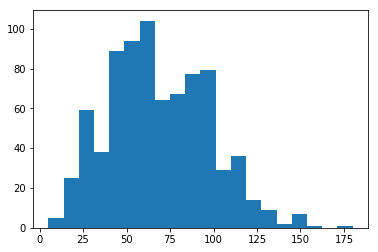

In [19]:
plt.hist(data = pokemon,
         x = 'Speed',
         bins = 20)

Repare que os limites das _bins_ não são valores inteiros porque forçamos o número de _bins_ pra algo mais ou menos tirado do sentido do vento. Mas podemos dar mais inteligência pra isso!
Sabemos que a velocidade só assume valores inteiros e gostamos de múltiplos de 5.

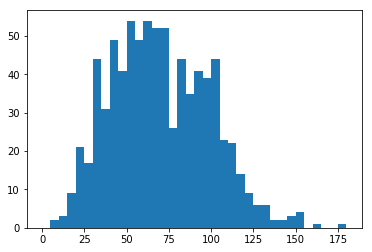

In [20]:
bins = np.arange(0, pokemon['Speed'].max() + 5, 5)    # adicionamos 5 ao valor superior porque o limite 
                                                      # superior do arange não é incluído no conjunto.
plt.hist(data = pokemon,
         x = 'Speed',
         bins = bins);

Agora eu tenho uma idéia muito mais clara das estatísticas descritivas desses dados... Lembrando que podemos acessar a versão numérica disso também:

In [21]:
pokemon['Speed'].describe()

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

#### Que que acontece se eu usar uma _bin_ pequena demais, tipo 1?
Hora de dar o show (:
![](https://media.giphy.com/media/ToMjGpys6SYsvUSE0JW/giphy.gif)

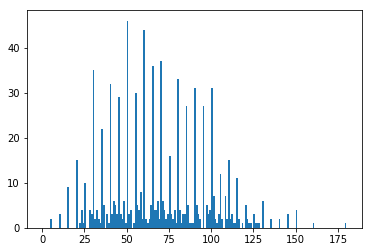

In [22]:
bins = np.arange(0, pokemon['Speed'].max() + 1, 1)

plt.hist(data = pokemon,
         x = 'Speed',
         bins = bins);

Os dados ficam granulados demais e não conseguimos mais tirar conclusões deles.

Podemos construir histogramas com o `seaborn` ou com o `matplotlib`, a depender da preferência do freguês.

/home/julia.tessler/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


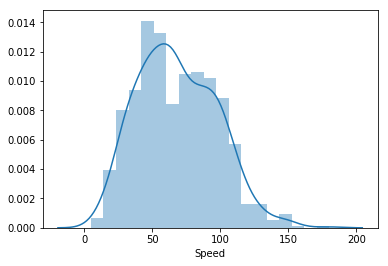

In [23]:
sns.distplot(pokemon['Speed']);

Note que o `seaborn` nos entrega o _kernel_ da distribuição, de forma que a área embaixo da curva deve ser 1. Podemos plotar a mesma coisa sem a linha:

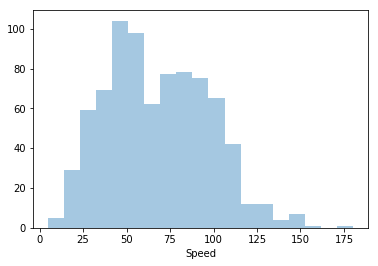

In [24]:
sns.distplot(pokemon['Speed'],
             kde = False);

E podemos alterar a transparência das barras, bem como o tamanho das _bins_:

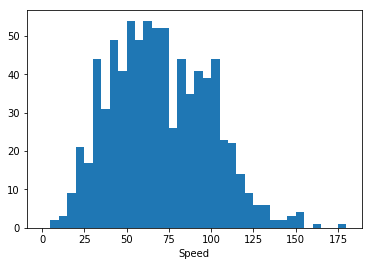

In [25]:
bins = np.arange(0, pokemon['Speed'].max() + 5, 5)

sns.distplot(pokemon['Speed'],
             kde = False,
             bins = bins,
             hist_kws = {'alpha': 1});     # esse é o cara que fala de opacidade

Histogramas são legais porque falam da distribuição dos dados e a distribuição dos dados é relevante porque todo o mundo da estatística se baseia nisso! (Mas não pirem nisso agora, tem chão nesse bootcamp ainda (: )

![](https://res.cloudinary.com/teepublic/image/private/s--R6U6EMSR--/t_Preview/b_rgb:ffffff,c_limit,f_jpg,h_600,q_90,w_600/v1519899416/production/designs/2408176_0.jpg)

### Que que cê pode me dizer sobre os ataques e defesas dos Pokemons?
Parece equilibrado?

Hora de dar o show (:
![](https://media.giphy.com/media/ToMjGpys6SYsvUSE0JW/giphy.gif)

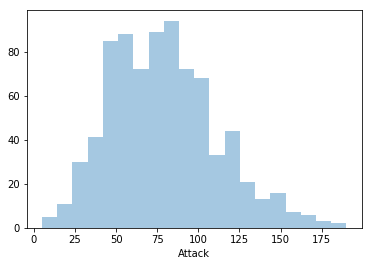

In [26]:
sns.distplot(pokemon['Attack'],
             kde = False);

In [27]:
pokemon['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

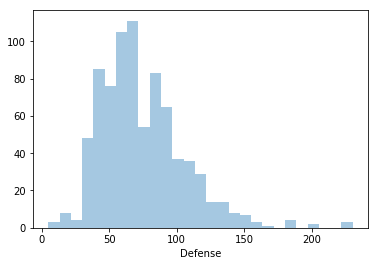

In [28]:
sns.distplot(pokemon['Defense'],
             kde = False);

In [29]:
pokemon['Defense'].describe()

count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: Defense, dtype: float64

Mas não é muito fácil comparar os dois assim... Por outro lado, posso plotar os dois juntos _in the shallow now_.

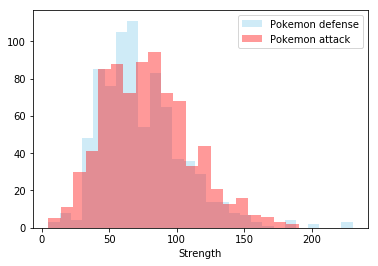

In [30]:
sns.distplot(pokemon['Defense'],
             color = 'skyblue',
             label = 'Pokemon defense',
             kde = False);
sns.distplot(pokemon['Attack'],
             color = 'red',
             label = 'Pokemon attack',
             kde = False);
plt.legend();
plt.xlabel('Strength');

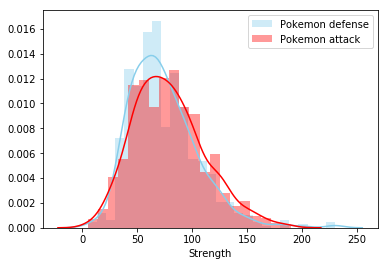

In [31]:
sns.distplot(pokemon['Defense'],
             color = 'skyblue',
             label = 'Pokemon defense');
sns.distplot(pokemon['Attack'],
             color = 'red',
             label = 'Pokemon attack');
plt.legend();
plt.xlabel('Strength');

**Em geral:**
* Gráfico de barras para variáveis qualitativas
* Histogramas para variáveis quantitativas

#### Estatísticas descritivas e _outliers_
Normalmente, montamos visualizações já pensando em quais são as perguntas que queremos responder e em qual é a finalidade da análise. Para treinar modelos, precisamos entender bem as relações entre os dados, bem como a possível necessidade de um bom trabalho de limpeza.

Um simples gráfico dá várias informações sobre a distribuição dos dados logo de cara:
* Os dados são simétricos ou assimétricos?
* Os dados são unimodais ou bimodais?

Histogramas com _outliers_ podem levar a conclusões erradas sobre a real distribuição dos dados.

In [32]:
# Vamos olhar um pouquinho pros hit points dos Pokemons
pokemon['HP'].describe()

count    800.000000
mean      69.258750
std       25.534669
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: HP, dtype: float64

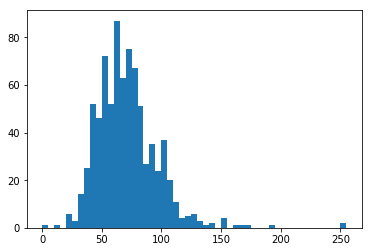

In [33]:
bins = np.arange(0, pokemon['HP'].max() + 5, 5)
plt.hist(data = pokemon,
         x = 'HP',
         bins = bins);

Tem um maluco ali que bate com mais força que o resto, aparentemente...

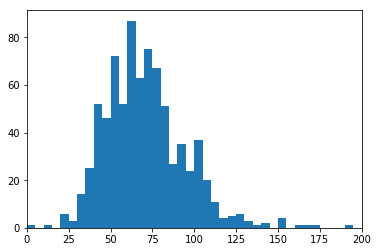

In [34]:
plt.hist(data = pokemon,
         x = 'HP',
         bins = bins);
plt.xlim((0, 200));

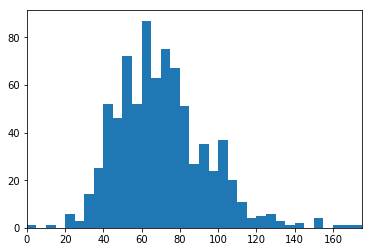

In [35]:
plt.hist(data = pokemon,
         x = 'HP',
         bins = bins);
plt.xlim((0, 175));

## Gráficos de dispersão e correlação
Em boa parte das vezes, estamos interessados em gráficos bivariados, porque queremos entender as relações entre variáveis.

Um dos mais populares para isso é o gráfico de dispersão, que está diretamente ligado à correlação entre as variáveis.

Com ele podemos ver, por exemplo, a relação entre Ataque e Defesa!

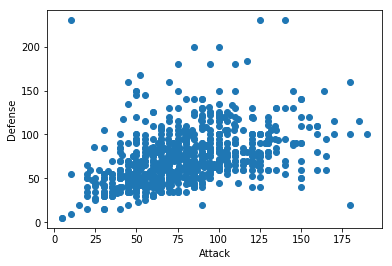

In [36]:
plt.scatter(data = pokemon,
            x = 'Attack',
            y = 'Defense');
plt.xlabel('Attack');
plt.ylabel('Defense');

Parece que temos uma relação... Podemos fazer a mesma coisa com o `regplot` do `seaborn` que, de quebra, nos dá a linha de regressão linear do gráfico, além de mudara opacidade dos pontos.

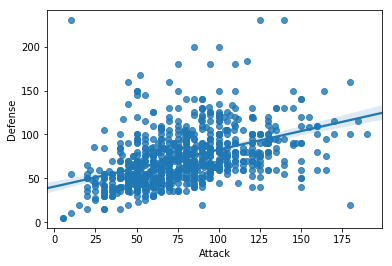

In [37]:
sns.regplot(data = pokemon,
            x = 'Attack',
            y = 'Defense');

Conseguimos o mesmo fator de opacidade no `matplotlib` através do parâmetro `alpha`.

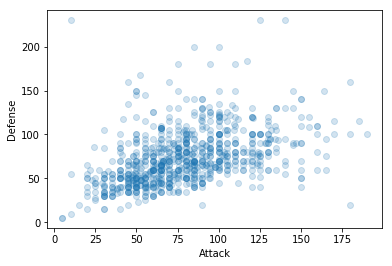

In [38]:
plt.scatter(data = pokemon,
            x = 'Attack',
            y = 'Defense',
            alpha = 1/5);
plt.xlabel('Attack');
plt.ylabel('Defense');

Uma forma mais matemática de entender a relação entre variáveis é através do coeficiente de correlação de Pearson. Tenha em mente que ele só avalia a correlação _linear_ entre duas variáveis.
![](https://statistics.laerd.com/statistical-guides/img/pearson-2-small.png)

In [39]:
pokemon[['Attack', 'Defense']].corr()

,Attack,Defense
Attack,1.000000,0.438687
Defense,0.438687,1.000000


## Boxplots
Mais uma das minhas coisas prediletas no mundo <3 

![](https://media.giphy.com/media/QbkL9WuorOlgI/giphy.gif)

Boxplots são mais uma forma de mostrar a relação entre uma variável numérica e outra categórica. Além de ser uma visualização "de cima" da distribuição dos dados.

![](https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png)

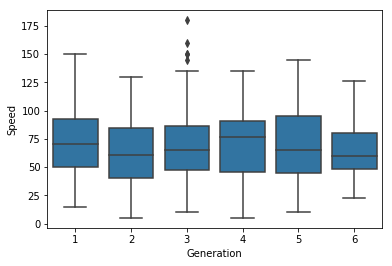

In [40]:
sns.boxplot(data = pokemon,
            x = 'Generation',
            y = 'Speed',
            color = base_color);

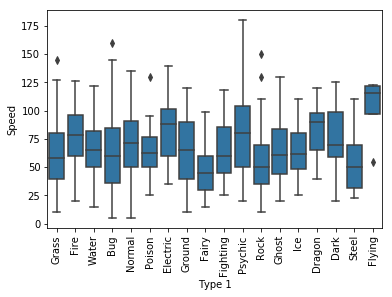

In [41]:
sns.boxplot(data = pokemon,
            x = 'Type 1',
            y = 'Speed',
            color = base_color);
plt.xticks(rotation = 90);

## Heatmaps (ou mapas de calor)
Uma forma muito rápida e visual de ter idéias da relação entre variáveis. Só funciona pra variáveis numéricas (né) e tem um bazilhão de formas diferentes de fazer, e de coisas diferentes.

* [Uma pancada de exemplos da própria documentação do Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

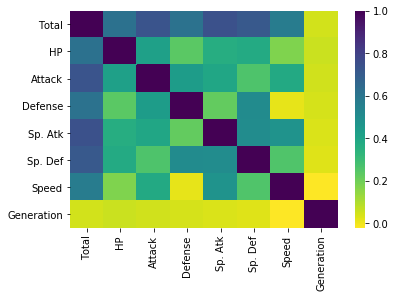

In [42]:
sns.heatmap(data = pokemon[['Total',
                            'HP',
                            'Attack',
                            'Defense',
                            'Sp. Atk',
                            'Sp. Def',
                            'Speed',
                            'Generation']].corr(),
            cmap = 'viridis_r');

# Agora me mostre o que você sabe.
Vamos trocar de dataset para os resultados da pesquisa de 2017 do Kaggle, [The State of Data Science and Machine Learning](https://www.kaggle.com/surveys/2017).

In [43]:
mc_responses = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', 
                           encoding = 'ISO-8859-1')
mc_responses.head()

/home/julia.tessler/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Qual será a idade dos cientistas de dados da pesquisa?
Será que o perfil é de gente mais jovem? Quantos anos tem o mais velho?

Para conseguir brincar, vamos transformar a variável de idade, `Age` em números inteiros.

In [44]:
mc_responses_copy = mc_responses.copy()

In [45]:
mc_responses.Age.isnull().sum()

331

In [46]:
mc_responses.shape

(16716, 228)

Ok, não são tantos nulos assim... Vamos substituí-los pelo quê? Podemos escolher 0, 1, a média, a mediana... O que preferimos?

In [47]:
# Eu tomei a decisão prévia de substituir por zero, porque queria dar destaque pra isso...
# Mas, na prática, depende da finalidade da substituição.
mc_responses['Age'] = mc_responses.Age.fillna(0).astype(int)

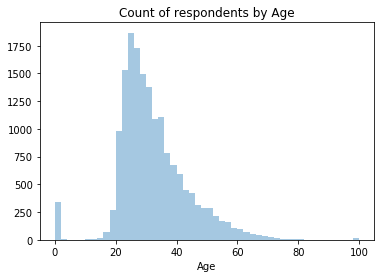

In [48]:
(sns.distplot(mc_responses['Age'], 
             kde = False)
    .set_title('Count of respondents by Age'));

# Showtime!
Ao invés de substituir os valores nulos por zero, troque pela média da idade. Em seguida, faça o histograma e troque a cor dele.

**Dica:** use a [paleta de cores do Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial)!

![](https://camo.githubusercontent.com/c0dbd3e526ee348950d56eb45be8d30858701bb7/68747470733a2f2f6d656469612e67697068792e636f6d2f6d656469612f7a787858594a71546c70426e4f2f67697068792e676966)

In [49]:
mc_responses_copy.Age.isnull().sum()

331

In [50]:
mc_responses_copy['Age'] = mc_responses.Age.fillna(mc_responses_copy['Age'].mean()).astype(int)

In [51]:
sum(mc_responses_copy['Age'] < 1)

341

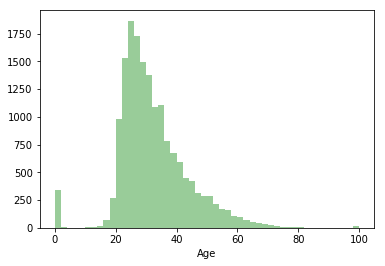

In [52]:
sns.distplot(mc_responses_copy['Age'], 
             color = 'g',
             kde = False);

# Quais são as áreas de graduação dos cientistas de dados?

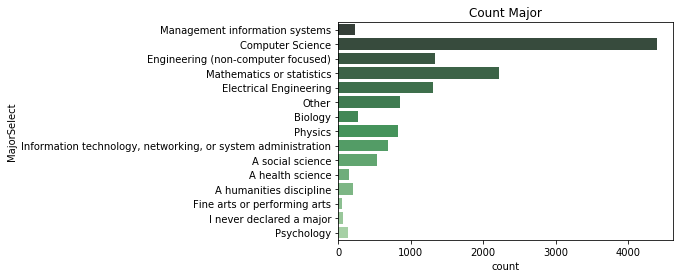

In [53]:
(sns.countplot(data = mc_responses,
              y = 'MajorSelect',
              palette = 'Greens_d')
    .set_title('Count Major'));

Uêba, ordenando fica melhor, né...

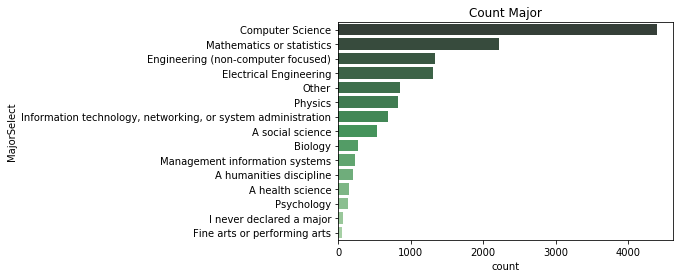

In [54]:
(sns.countplot(data = mc_responses,
               y = 'MajorSelect',
               palette = 'Greens_d',
              order = mc_responses['MajorSelect'].value_counts().index)
    .set_title('Count Major'));

Agora ficou bem mais claro... A maior parte dos cientistas de dados estudou ciência da computação, seguidos por matemática ou estatística e engenharia (geral, mas seguida de perto por engenharia elétrica).

# Qual é o maior grau de graduação dentre os cientistas de dados?

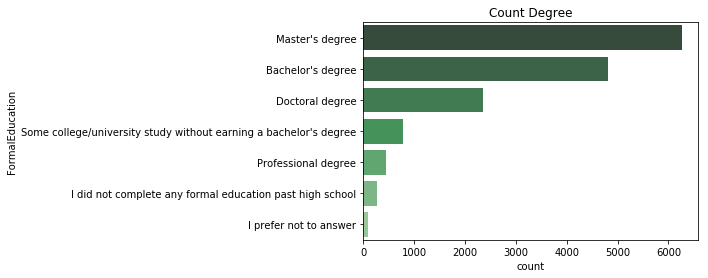

In [55]:
(sns.countplot(data = mc_responses,
               y = 'FormalEducation',
               palette = 'Greens_d', 
               order = mc_responses['FormalEducation'].value_counts().index)
    .set_title('Count Degree'));

# Tá, chega de brincadeira... Conversem com os amiguinhos e vamos resolver uns desafios desafiadores.
## Qual é a correlação dos tempos das etapas de um projeto de data science de acordo com os pesquisados?
As informações dos tempos existem nas colunas:
* TimeGatheringData
* TimeVisualizing
* TimeModelBuilding
* TimeFindingInsights
* TimeProduction

**Dica:** [esse tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html). E use apenas essas variáveis!

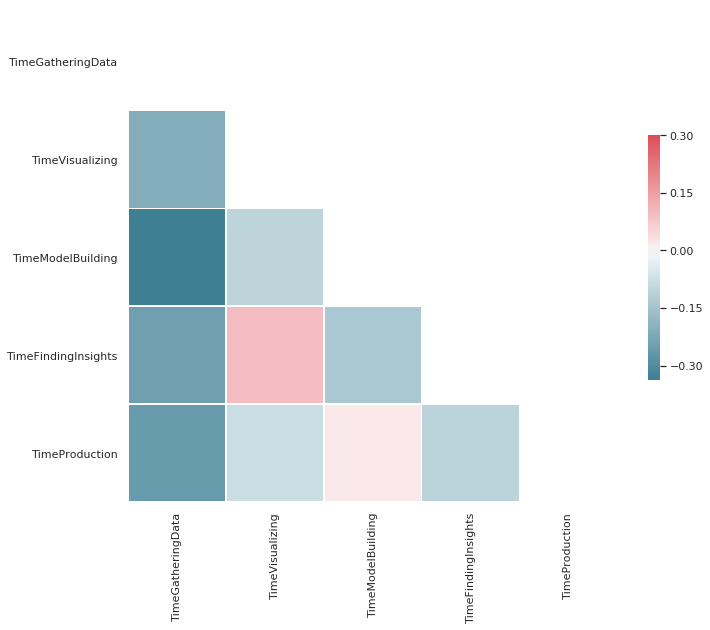

In [56]:
sns.set(style = "white")

# Generate a large random dataset
d = mc_responses[['TimeGatheringData', 
                  'TimeVisualizing', 
                  'TimeModelBuilding', 
                  'TimeFindingInsights',
                  'TimeProduction']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap,
            vmax = .3,
            center = 0,
            square = True, 
            linewidths = .5,
            cbar_kws = {"shrink": .5});

## % de tempo investido criando modelos?
Use a variável `TimeModelBuilding` e pense numa visualização útil.

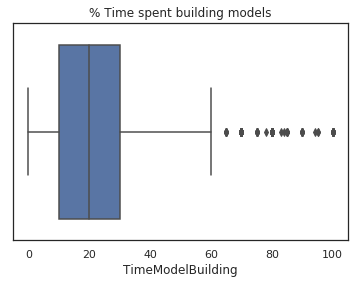

In [57]:
(sns.boxplot(mc_responses['TimeModelBuilding'])
    .set_title('% Time spent building models'));

## Quais foram os empregos anteriores dos cientistas de dados?
Essa informação existe em `PastJobTitlesSelect`. Veja que essa coluna possui vários valores. Você precisará criar um método para reduzir a granularidade dessa coluna.

**Dica:** A solução fica mais fácil se você usar [expressões regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular). Para testá-las use [esse site](https://regexr.com/).

In [58]:
mc_responses['PastJobTitlesSelect'].value_counts()

I haven't started working yet                                                                                                                                                                                                1454
Other                                                                                                                                                                                                                        1043
Researcher                                                                                                                                                                                                                    786
Software Developer/Software Engineer                                                                                                                                                                                          784
Engineer                                                                                        

In [59]:
print(mc_responses['PastJobTitlesSelect'][0])
print(re.sub(r'(?=,).*', '', mc_responses['PastJobTitlesSelect'][0]))

Predictive Modeler,Programmer,Researcher
Predictive Modeler


In [60]:
mc_responses['PastJobTitlesSelect'] = mc_responses['PastJobTitlesSelect'].fillna('NULL')

In [61]:
past_job_category = []

for s in mc_responses['PastJobTitlesSelect']:
    past_job_category.append(re.sub(r'(?=,).*', '', s))
    
mc_responses['PastJobTitles'] = past_job_category

In [62]:
mc_responses['PastJobTitles'] = mc_responses['PastJobTitlesSelect'].apply(lambda x: re.sub(r'(?=,).*', '', x))

In [63]:
mc_responses[['PastJobTitles', 'PastJobTitlesSelect']].head(5)

,PastJobTitles,PastJobTitlesSelect
0,Predictive Modeler,"Predictive Modeler,Programmer,Researcher"
1,Software Developer/Software Engineer,Software Developer/Software Engineer
2,Data Scientist,"Data Scientist,Machine Learning Engineer"
3,Business Analyst,"Business Analyst,Operations Research Practitio..."
4,Computer Scientist,"Computer Scientist,Data Analyst,Data Miner,Dat..."


In [64]:
mc_responses['PastJobTitles'].value_counts()

NULL                                    2524
Business Analyst                        2338
Data Analyst                            1806
I haven't started working yet           1454
Engineer                                1302
Computer Scientist                      1232
Researcher                              1125
Other                                   1083
Programmer                              1002
Data Scientist                           935
Software Developer/Software Engineer     861
DBA/Database Engineer                    326
Data Miner                               212
Machine Learning Engineer                202
Statistician                             146
Predictive Modeler                        85
Operations Research Practitioner          83
Name: PastJobTitles, dtype: int64

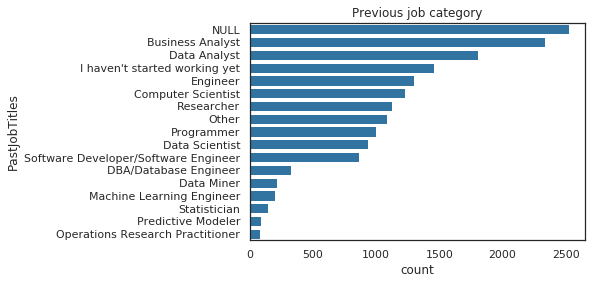

In [65]:
(sns.countplot(data = mc_responses,
               y = 'PastJobTitles', 
               order = mc_responses['PastJobTitles'].value_counts().index,
               color = base_color)
    .set_title('Previous job category'));

# Links extras
* Uma das análises desse dataset no blog do kaggle -> http://blog.kaggle.com/2017/10/30/introducing-kaggles-state-of-data-science-machine-learning-report-2017/
* Joyplots -> http://blog.kaggle.com/2017/07/20/joyplots-tutorial-with-insect-data/
* Plots de mapas -> http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/
* Pra inspirar -> https://informationisbeautiful.net/